<a href="https://colab.research.google.com/github/Noahkandie/Hyperthyroid-Model/blob/main/Hypothyroid_Model_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


## Overview 
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


Part 1: Decision trees:

* For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
* Try and optimize each of the models, making sure to document how you've set up your hyperparameters.
* Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
* Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

* In this section, you may be required to clean the data a little bit so as to make sense of the features.
* Document what transformation you've done on the data.
* Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

    - After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.





## Research Question

**a) Specifying the Data Analytic Question**
The research question is to use the given variables to predict whether or not a patient has hypothyroid.


**b) Metric for Success**

The project will be a success if we are able to create a model that will accurately determine whether or not a patient symptoms indicate that the patient has hypothyroid. We will use accuracy score, confusion matrix, mse as the metrics for testing perfomance of our models


**c) Understanding the context**

Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Hypothyroidism is tested using personal and family history, Physical examinations and blood tests.

Physical Examination—Looking for Signs of Hypothyroidism which include:

Evidence of dry skin,Swelling around the eyes and legs, Slower reflexes, Slower heart rate

Blood Tests: Hypothyroidism can be detected by different blood tests.

TSH Test. A thyroid-stimulating hormone or TSH is a blood test that measures the amount of T4 (thyroxine) that the thyroid is being signaled to make. If you have an abnormally high level of TSH, it could mean you have hypothyroidism. T4 (thyroxine) Test. The thyroid gland produces T4 (thyroxine). The free T4 and the free T4 index are blood tests that, in combination with a TSH test, can let your physician know how your thyroid is functioning.


**d) Experimental design taken**

In this study, we will be conducting Exploratory Data Analysis to study the relationships between the different variables. Later we will create a number of models to try find the most accurate model to predict hypothyroidism

Data cleaning & preparation

 a) loading libraries and data set
 b) remove missing values & duplicates
 c) remove and/or rename columns where necessary
 d) change data type where necessary

Exploratory Data Analysis

 a) univariate analysis
 b) bivariate analysis

Modeling

 a) Decision Trees
     - Carry out feature engineering & selection
     - Split data into train & test sets
     - Use random forest, Ada Boost, and/or Gradient Boost
     - Visualize the decision trees created
     - Optimize the models
     - Select the model you trust most (random forest, ada boosted forest, gradient boosted forest) & identify the most impactful features
 
 
 b) Support Vector Machines
     - Clean data & document
     - Apply polynomial, linear, & rbf kernels
     - Evaluate kernel performance & select best-performancing kernel
     - Use tuned hyperparameters on best kernel to make predictions



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv('/content/hypothyroid.csv')
df[:5]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

The data has 26 columns and 3163 records. All columns are of the object datatype. 

## Data Cleaning and Preparation

Our dataset comprises of individual mediacal information which vary from person to person. Also some of the missing values are present because a certain test was not taken. For this analysis we are going to fill in columns with the mean values if a patient tested negative for hypothyroid and with the mean values for those that tested positive. Also for missing values in age and sex columns we will fill in age with median and drop all nan values is sex

In [5]:
# Check the number of unique values in the dataset columns
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [6]:
# Checking the unique values of each of our columns

column= df.columns.to_list()

for column in column:
    print("\n")
    print("Column Name:", column)
    print(df[column].unique())





Column Name: status
['hypothyroid' 'negative']


Column Name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column Name: sex
['M' 'F' '?']


Column Name: on_thyroxine
['f' 't']


Column Name: query_on_thyroxine
['f' 't']


Column Name: on_antithyroid_medication
['f' 't']


Column Name: thyroid_surgery
['f' 't']


Column Name: query_hypothyroid
['f' 't']


Column Name: query_hyperthyroid
['f' 't']


Column Name: pregnant
['f' 't']


Column Name: sick
['f' 't']


Column Name: tumor
['f' 't']


Column Name: lithium
['f' 't']


Column Name: goitre
['f' 't']


Column Name

The status column has two unique variables; hypothyroid or negative. 
We can assume the ? is an anomaly that represents a missing value because feature was not measured . Therefore we will replace it with NaN.

We also note columnns with numerical values amd those with string values

In [7]:
# Replace '?' with NaN then, preview the dataset
df=df.replace('?', np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        2717 non-null   object
 2   sex                        3090 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [9]:
# Separate the numerical columns from categorical
column=list(df.columns)
numerical=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
cat=list(set(column)-set(numerical))
print(cat)
print('\n')
# Change the datatypes
for column in df.columns:
  if column in numerical:
    df[column] = df[column].astype('float')
  elif column in cat:
    df[column] = df[column].astype('category')
df.dtypes

['status', 'pregnant', 'TBG_measured', 'lithium', 'sick', 'on_antithyroid_medication', 'goitre', 'TSH_measured', 'thyroid_surgery', 'T4U_measured', 'query_hyperthyroid', 'TT4_measured', 'query_on_thyroxine', 'FTI_measured', 'on_thyroxine', 'tumor', 'sex', 'query_hypothyroid', 'T3_measured']




status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [10]:
# Filling in missing values with mean according whether their diagnosis was positive or negative 
df = df.groupby('status').apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
TBG                           0
dtype: int64

In [11]:
# We will drop the missing values from the Sex column, since they are a small number 73/3163
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum()


(3090, 26)


status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [12]:
# Check for duplicates
df[df.duplicated()].head()
df.drop_duplicates(inplace=True)

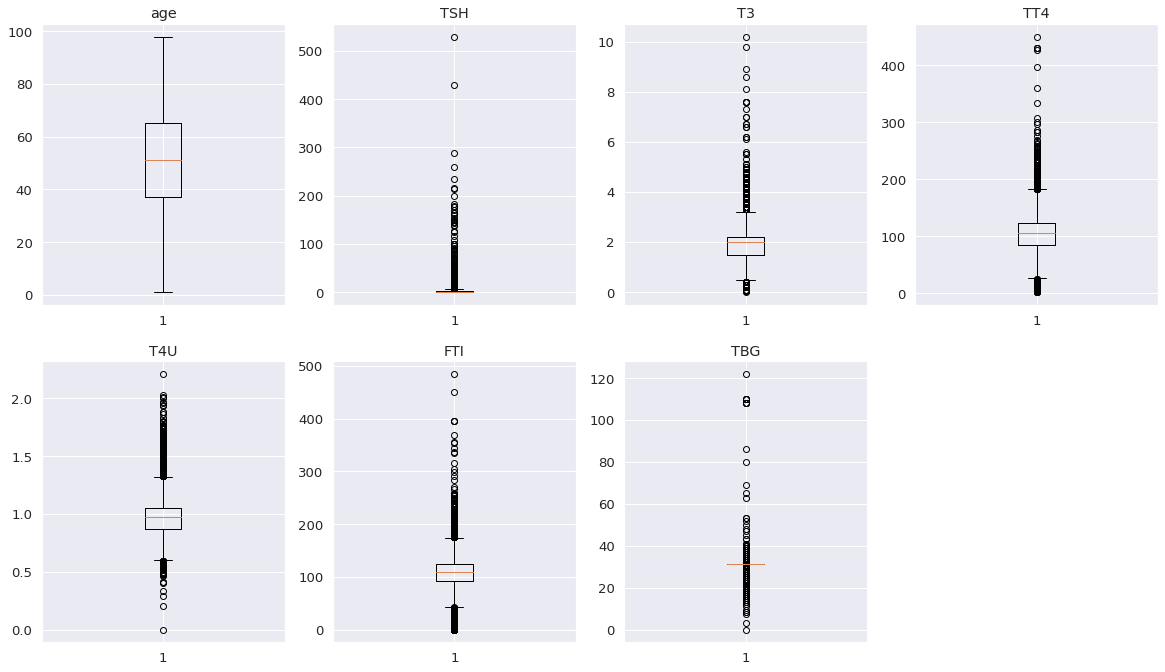

In [13]:
columns_dict={'age':1, 'TSH':2, 'T3':3, 'TT4':4, 'T4U':5, 'FTI':6, 'TBG':7}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)
plt.show()

We shallignore the outliers because it is a medicalfield and all the data is needed

In [14]:
# Create a separate dataframe to model using a decision tree
df_tree=df.copy()

## Exploratory Data Analysis 

In [15]:
df.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3013,3013.000000,3013,3013,3013,3013,3013,3013,3013,3013,3013,3013,3013,3013,3013,3013.000000,3013,3013.000000,3013,3013.000000,3013,3013.000000,3013,3013.000000,3013,3013.000000
unique,2,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,NaN
freq,2874,NaN,2119,2572,2958,2971,2912,2779,2781,2953,2917,2973,3011,2918,2570,NaN,2345,NaN,2778,NaN,2779,NaN,2780,NaN,2767,NaN
mean,NaN,51.169823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.357177,NaN,1.935036,NaN,108.627786,NaN,0.983874,NaN,112.354116,NaN,31.205371
std,NaN,18.020234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.480146,NaN,0.854199,NaN,42.482483,NaN,0.209375,NaN,40.831115,NaN,5.400484
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.500000,NaN,85.000000,NaN,0.870000,NaN,92.000000,NaN,31.298054
50%,NaN,50.988764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.987259,NaN,106.000000,NaN,0.973893,NaN,109.000000,NaN,31.298054
75%,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.521481,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,125.000000,NaN,31.298054


Sex

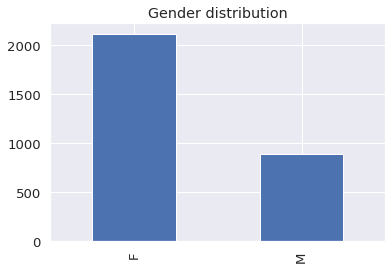

In [16]:
df['sex'].value_counts().plot(kind='bar',title='Gender distribution')


Our data set is very biased because we can see that females outnumber males by more than twice.

status  hypothyroid  negative
sex                          
F               102      2017
M                37       857


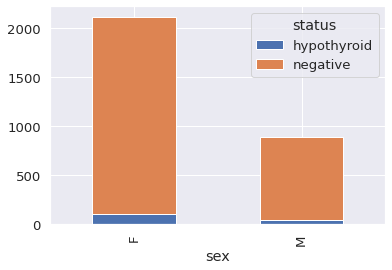

In [17]:
# Distribution of gender v hyperthyroid status
a1=pd.crosstab(df['sex'],df['status'])
print(a1)

a1.plot.bar(stacked=True,edgecolor='white')

Our data set is very biased because we can see that females with hyperthyroid issues outnumber males by more than twice.

Age

In [18]:
# Check for the Age distribution

print("Mean age = ", df['age'].mean())
print("Median age = ", df['age'].median())
print("Modal age =",df['age'].mode())


Mean age =  51.1698232532348
Median age =  50.98876404494382
Modal age = 0    50.988764
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


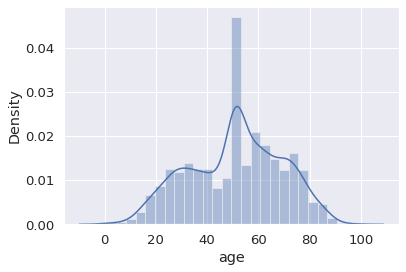

In [19]:
# Checking the distribution of age 
sns.distplot(df.age)



Text(0.5, 1.0, 'Age distribution of hypothyroid patients')

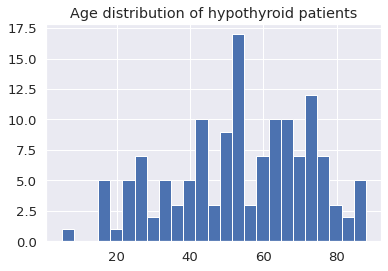

In [20]:
# Checking the Age distribution with patients with hypothyroidism
thyr=df[df['status']=='hypothyroid']
thyr['age'].hist(bins=25)
plt.title('Age distribution of hypothyroid patients')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


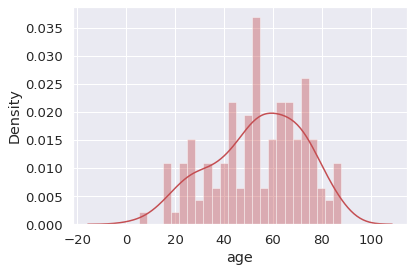

In [21]:
sns.distplot(thyr.age,bins=25,color='r')

We get a normal distribution in the age variable. The means of central tendency range around 50-51. This can be contributed by filling null values with the mean.

We notice the number of hypothyroid patients flactuate but still exhibit a normal dist. 

negative       2874
hypothyroid     139
Name: status, dtype: int64


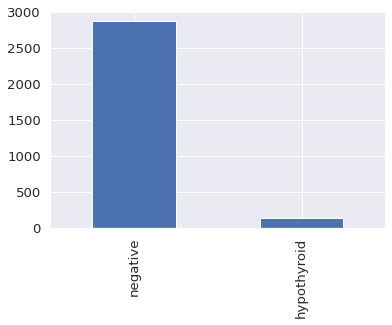

In [22]:
a2=df['status'].value_counts()
print(a2)
a2.plot.bar()



It appears that most of the observations have reported 'negative'. Those without hypothyroidism outnumber those with it 2874 to 139 which makes this dataset very biased and also not appropriate enough to effectively and realistically answer the research question

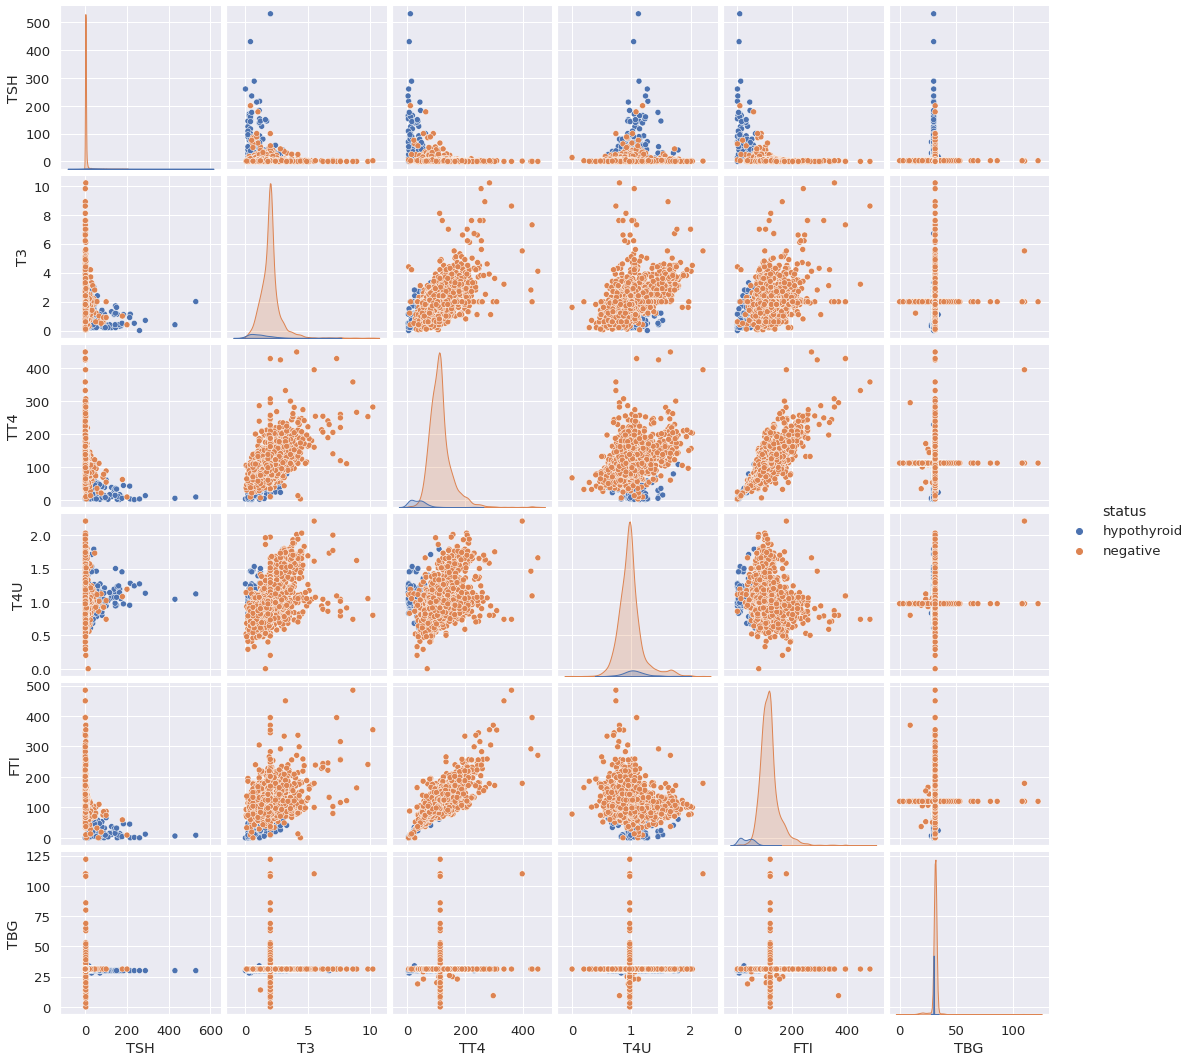

In [23]:
# scatterplot of test results
numerical = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

sns.pairplot(df, kind = "scatter", diag_kind = "kde", vars = numerical,
            hue = "status")

Hyperthyroidism shows up more in TSH tests, indicating that that test is an important factor influencing it. We also see that linear models will not work well with this data so we can only use them for comparison purposes.

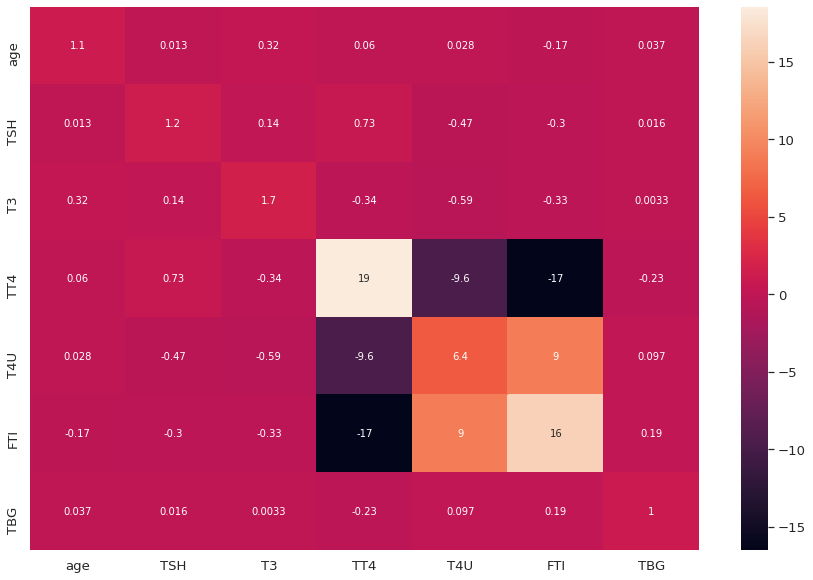

In [24]:
# investigating the correlation between variables
corr = df.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)





A Variance Inflation Factor (VIF) score of around 5 is problematic. so we will drop the TT4 variable.

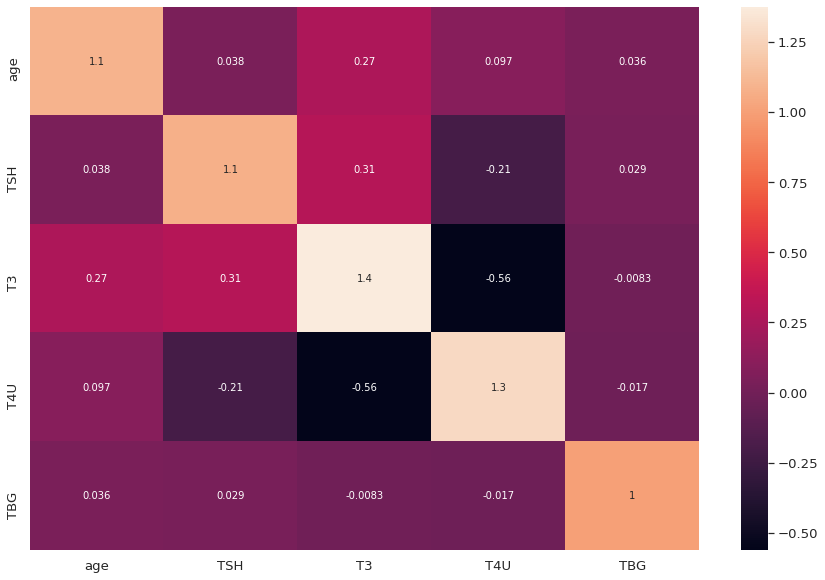

In [25]:
df = df.drop(columns = ['TT4_measured', 'TT4', 'FTI_measured', 'FTI'], axis = 1)

corr = df.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, 
                   columns = corr.columns)

plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)

This is better. We see that the VIF of T4U has decreased significantly from 6.4 to 1.2. This shows that it had some amount of collinearity with one of the variables that we have dropped.


## Feature Engineering

In [26]:
df_tree.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [27]:
features=[ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

In [28]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
df_tree=df_tree.apply(LabelEncoder().fit_transform)
df=df.apply(LabelEncoder().fit_transform)

In [29]:
df_tree.dtypes

status                       int64
age                          int64
sex                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
TSH_measured                 int64
TSH                          int64
T3_measured                  int64
T3                           int64
TT4_measured                 int64
TT4                          int64
T4U_measured                 int64
T4U                          int64
FTI_measured                 int64
FTI                          int64
TBG_measured                 int64
TBG                          int64
dtype: object

In [63]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = df_tree['status'].values

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df_tree[features].values


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



## Decision Trees
### Random Forest Classifier

In [64]:

# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,904.000000,904.000000
mean,0.961283,0.962389
std,0.193026,0.190358
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [65]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.0011061946902654867
Mean Squared Error: 0.0011061946902654867
Root Mean Squared Error: 0.033259505261886965


In [66]:
print(accuracy_score(y_test, y_pred))

0.9988938053097345


In [67]:
confusion_matrix(y_test, y_pred)

array([[ 34,   1],
       [  0, 869]])

Using default hyperparameters we achieved an accuracy score 99.89%. From the confusion matrix, we see that only one prediction was wrong. Our model is overfit. We will tune our parameters to fix the overfittness

Tuning hyperparameter

In [68]:
grid_param = {
    'n_estimators': [10,20,30,50,100,200,500,1000],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [*range(3,10,1)]
}

In [69]:
# # Training and Cross Validation
# # ---

# from sklearn.model_selection import RandomizedSearchCV
# gd_sr = RandomizedSearchCV(estimator=forest,
#                      param_distributions=grid_param,
#                      scoring='accuracy',
#                      n_jobs=-1)

# gd_sr.fit(X_train, y_train)

In [70]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 500, 'max_depth': 6, 'criterion': 'gini'}


We use the best parameters

In [71]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=6,criterion= 'gini')
rfc.fit(X_train,y_train)

# predictions
rfc2_pred = rfc.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Comparison Frame')
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('\n')
print('Errors')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfc2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfc2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfc2_pred)))



Comparison Frame
           Actual   Predicted
count  904.000000  904.000000
mean     0.961283    0.962389
std      0.193026    0.190358
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


Errors
Mean Absolute Error: 0.0011061946902654867
Mean Squared Error: 0.0011061946902654867
Root Mean Squared Error: 0.033259505261886965


In [72]:
from sklearn.metrics import accuracy_score , confusion_matrix
print('confusion matrix')
print(confusion_matrix(y_test, rfc2_pred))

print( 'Accuracy Score =',accuracy_score(y_test, rfc2_pred))


confusion matrix
[[ 34   1]
 [  0 869]]
Accuracy Score = 0.9988938053097345


In [74]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.22), ('T3_measured', 0.01), ('T3', 0.05), ('TT4_measured', 0.01), ('TT4', 0.13), ('T4U_measured', 0.0), ('T4U', 0.02), ('FTI_measured', 0.01), ('FTI', 0.26), ('TBG_measured', 0.01), ('TBG', 0.24)]

Variable: FTI                  Importance: 0.26
Variable: TBG                  Importance: 0.24
Variable: TSH                  Importance: 0.22
Variable: TT4                  Importance: 0.13
Variable: T3                   Importance: 0.05
Variable: T4U                  Importance: 0.02
Variable: age                  Importance: 0.01
Variable: T3_measured          Importance: 0.01
Variable: TT4_measured         Importance: 0.01
Variable: FTI_measured         Importance: 0.01
Var

### Gradient Boosted Trees

In [75]:
#Tuning the learning rate hyperparameter
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gbc.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbc.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.955
Accuracy score (validation): 0.965

Learning rate:  0.1
Accuracy score (training): 0.982
Accuracy score (validation): 0.982

Learning rate:  0.25
Accuracy score (training): 0.991
Accuracy score (validation): 0.989

Learning rate:  0.5
Accuracy score (training): 0.996
Accuracy score (validation): 0.991

Learning rate:  0.75
Accuracy score (training): 0.938
Accuracy score (validation): 0.939

Learning rate:  1
Accuracy score (training): 0.948
Accuracy score (validation): 0.950



The learning rate of 0.75 is the best rate because its accuracy is lower than the other learning rates. The training and validation score is close enough, hence we can use it to calculate Gradient Boosting Classifier 

In [76]:
gbc = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0)
gbc.fit(X_train, y_train)
gb_pred = gbc.predict(X_test)

# Assessing the errors
print('\n')
print('Errors')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gb_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gb_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))

from sklearn.metrics import accuracy_score , confusion_matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, gb_pred))
print('\n')
print('Accuracy Score')
print(accuracy_score(y_test, gb_pred))



Errors
Mean Absolute Error: 0.06084070796460177
Mean Squared Error: 0.06084070796460177
Root Mean Squared Error: 0.24665909260475635


Confusion Matrix
[[ 22  13]
 [ 42 827]]


Accuracy Score
0.9391592920353983


The accuracy score after gradient boosting, has lowered to 93.9159%. 

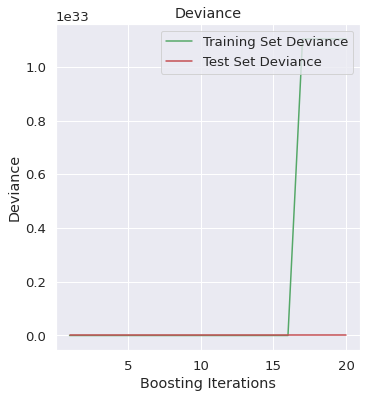

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(20) + 1, gbc.train_score_, 'g-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((20,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbc.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbc.loss_(y_test, y_pred)
    
plt.plot(np.arange(20) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()


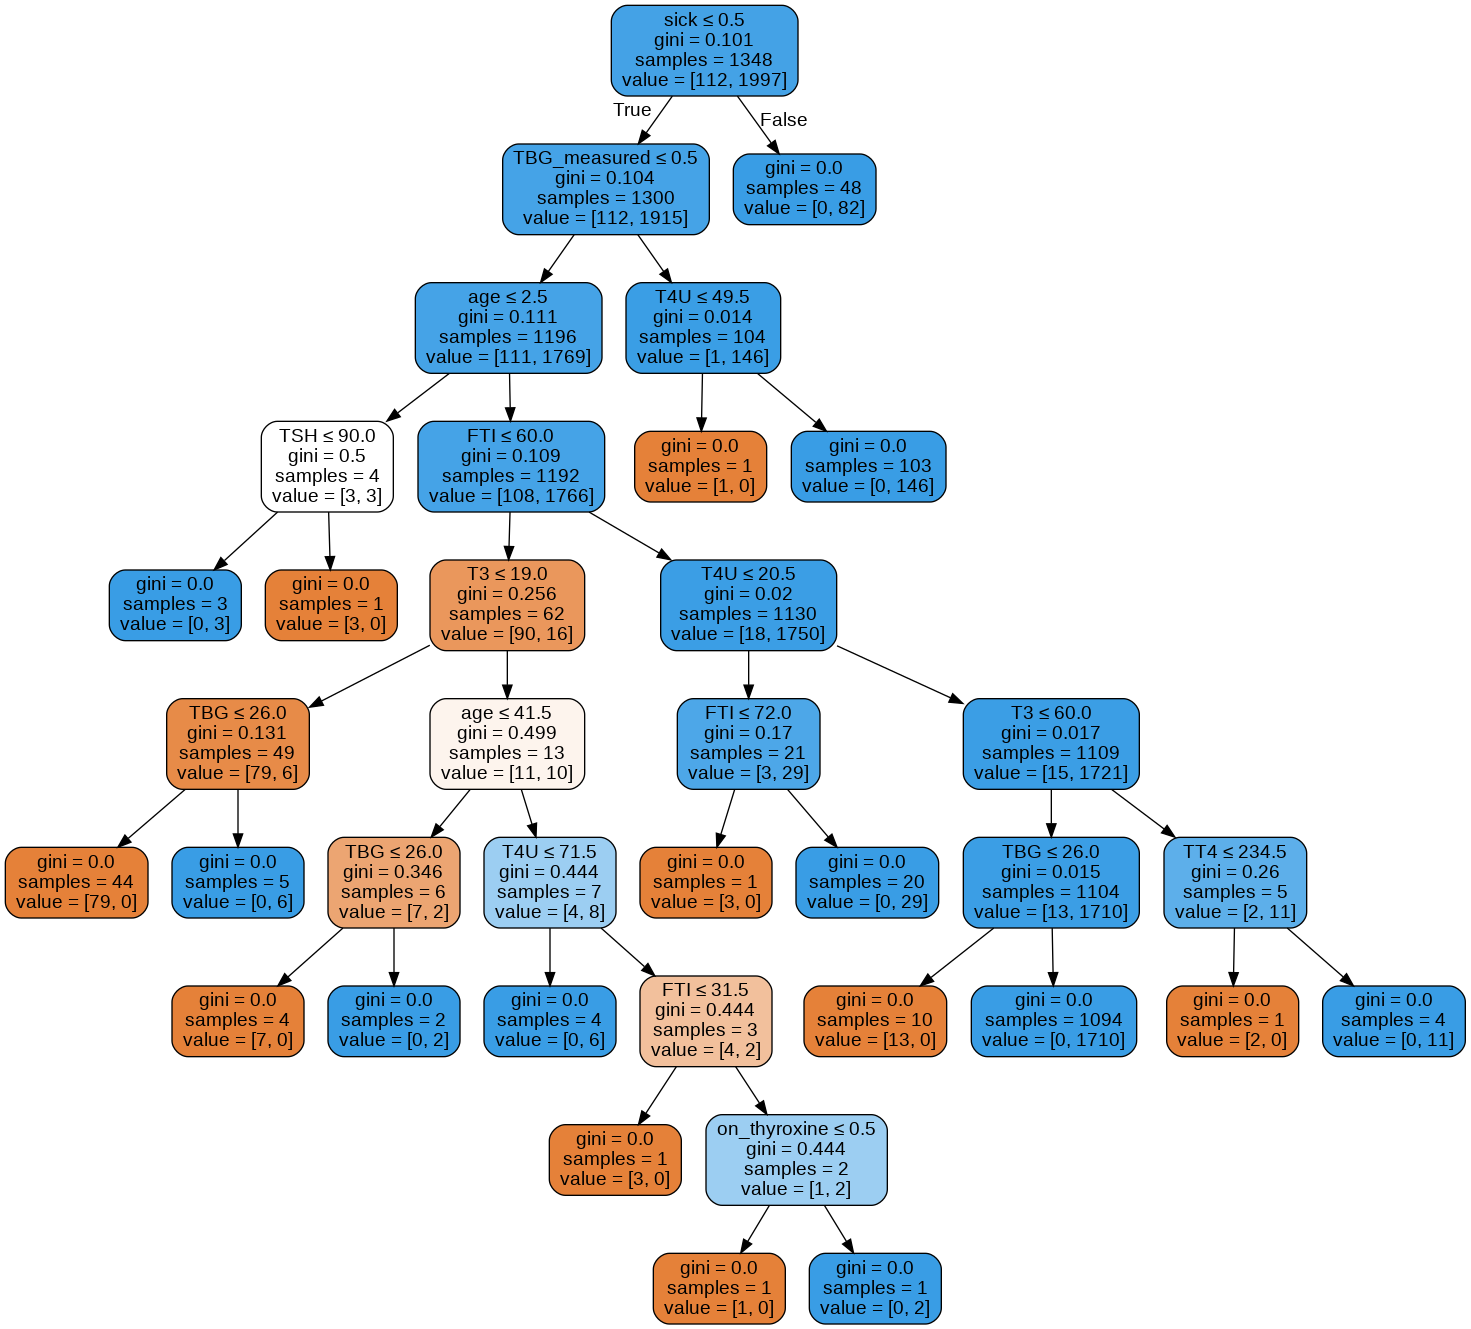

In [78]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest e.g. 10th
tree = forest.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hyperthyroid_forest.png')
Image(graph.create_png())

In [79]:
# Get numerical feature importances
importances = list(gbc.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.01), ('sex', 0.55), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.12), ('TSH_measured', 0.0), ('TSH', 0.08), ('T3_measured', 0.01), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.03), ('T4U_measured', 0.03), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.09), ('TBG_measured', 0.0), ('TBG', 0.05)]

Variable: sex                  Importance: 0.55
Variable: goitre               Importance: 0.12
Variable: FTI                  Importance: 0.09
Variable: TSH                  Importance: 0.08
Variable: TBG                  Importance: 0.05
Variable: TT4                  Importance: 0.03
Variable: T4U_measured         Importance: 0.03
Variable: age                  Importance: 0.01
Variable: T3_measured          Importance: 0.01
Variable: T3                   Importance: 0.01
Vari

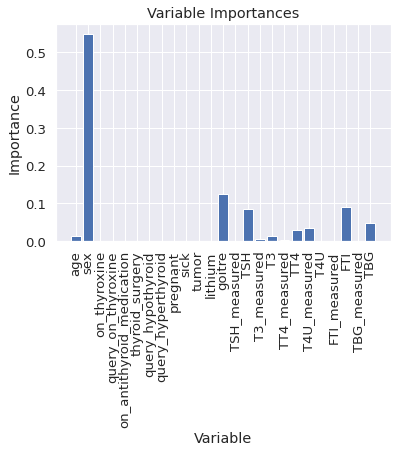

In [80]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


The variable that are significant are:

- Variable: sex                  Importance: 0.55
- Variable: goitre               Importance: 0.12
- Variable: FTI                  Importance: 0.09
- Variable: TSH                  Importance: 0.08
- Variable: TBG                  Importance: 0.05
- Variable: TT4                  Importance: 0.03


## Support Vector Machines



Here we will apply Polynomial, linear and rbf kernel function to build our SVM model and then evaluate their performance and pick the kernel that performs the best. We will also tune our parameters to improve the performance of our model.      
We will be using the data we splitted when we were preparing for modelling. Since we are using SVM here, we will scale our features.


In [81]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = df['status'].values

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.

X = df.drop('status',axis=1).values


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


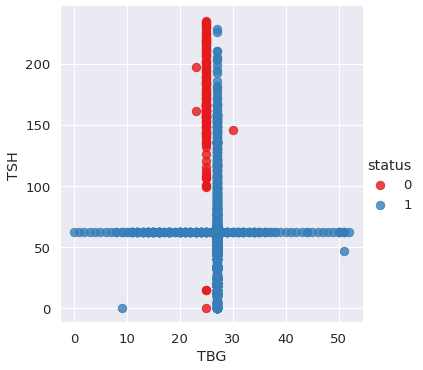

In [82]:
# Plotting with two features from gradient boosting feature importance
sns.lmplot('TBG','TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [83]:
# applying Principal Component Analysis (PCA) to reduce the number of variables
# for our data
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(X)
X = pca.transform(X)
X.shape



(3013, 3)

In [84]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data
linear.fit(X_train, y_train)

# making predictions
lin_y_pred = linear.predict(X_test)

# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, lin_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, lin_y_pred))

Linear kernel score: 0.9889380530973452
Linear kernel confusion matrix:
 [[ 29   6]
 [  4 865]]


### Polynomial Kernel

In [85]:
# trying it out with a polynomial kernel
poly = SVC(kernel = 'poly', gamma = 'auto')

# training the model
poly.fit(X_train, y_train)

# making prediction
poly_y_pred = poly.predict(X_test)

# assessing the model
print("Polynomial kernel score:", accuracy_score(y_test, poly_y_pred))
print("Polynomial kernel confusion matrix:\n", confusion_matrix(y_test, poly_y_pred))


Polynomial kernel score: 0.9933628318584071
Polynomial kernel confusion matrix:
 [[ 32   3]
 [  3 866]]


### Radial Basis Function (RBF) Kernel

In [86]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
rbf_y_pred = rbf.predict(X_test)

# assessing the model
print("RBF kernel score:", accuracy_score(y_test, rbf_y_pred))
print("RBF kernel confusion matrix:\n", confusion_matrix(y_test, rbf_y_pred))

RBF kernel score: 0.9612831858407079
RBF kernel confusion matrix:
 [[  0  35]
 [  0 869]]


### Sigmoid Kernel

In [87]:
# finally doing it with the sigmoid kernel
sig = SVC(kernel = 'sigmoid', gamma = 'auto')

# training the model
sig.fit(X_train, y_train)

# making prediction
sig_y_pred = sig.predict(X_test)

# assessing the model
print("Sigmoid kernel score:", accuracy_score(y_test, sig_y_pred))
print("Sigmoid kernel confusion matrix:\n", confusion_matrix(y_test, sig_y_pred))

Sigmoid kernel score: 0.9612831858407079
Sigmoid kernel confusion matrix:
 [[  0  35]
 [  0 869]]


*Kernel Score*

Linear: 0.9889380530973452 
Polynomial: 0.9933628318584071
Rbf: 0.9612831858407079    
Sigmoid: 0.9612831858407079



As we can see, the sigmoid and rbf kernels are the best performing while the polynomial kernel, although still while good, is the worst performing of the 4 SVM kernels used.


Performing Cross validation using  Randomized CV

In [93]:
from sklearn.model_selection import RandomizedSearchCV 
params_grid = [{'kernel': ['rbf','sigmoid','poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
svm_model = RandomizedSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 



Best score for training data: 0.995731219956997 



In [94]:
# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
svm_pred = final_model.predict(X_test)

Best C: 100 

Best Kernel: poly 

Best Gamma: 0.001 



In [98]:
# Building the model 
rbfclassifier = SVC(kernel='poly',gamma=0.0001,C=100)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [100]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9823008849557522
[[ 23  12]
 [  4 865]]


Despite cross-validation, the accuracy score of 0.9823 using polynomial kernel is lower than the original rbf & sigmoid score.Therefore, the best model to implement to predict hyperthyroidism is Rbf and sigmoid kernels.

## Conclusion & Challenging the solution

Overall, we see that our models have all performed well. The only problem here is that the data set is very imbalanced and biased. It would have been better to have a dataset that has roughly the same number of male and female patients, and the same for those with hypothyroid and those without. Also, it would have been great to have a data set with fewer missing values.

Furthermore, the lack of domain knowledge inhibited me from properly attempting to answer the research question. I did not understand what exactly terms like 'on_thyroxine', 'TSH', and so I could not fully investigate the relevant variables.

With that said, I should have done even more exhaustive exploratory data analysis, especially bivariate and multivariate analysis. Finally, I should play around with the parameters of the different models like the degree, maximum depth, number of estimators, and so on so as to find the parameters that best optimize the respective models.
